In [8]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

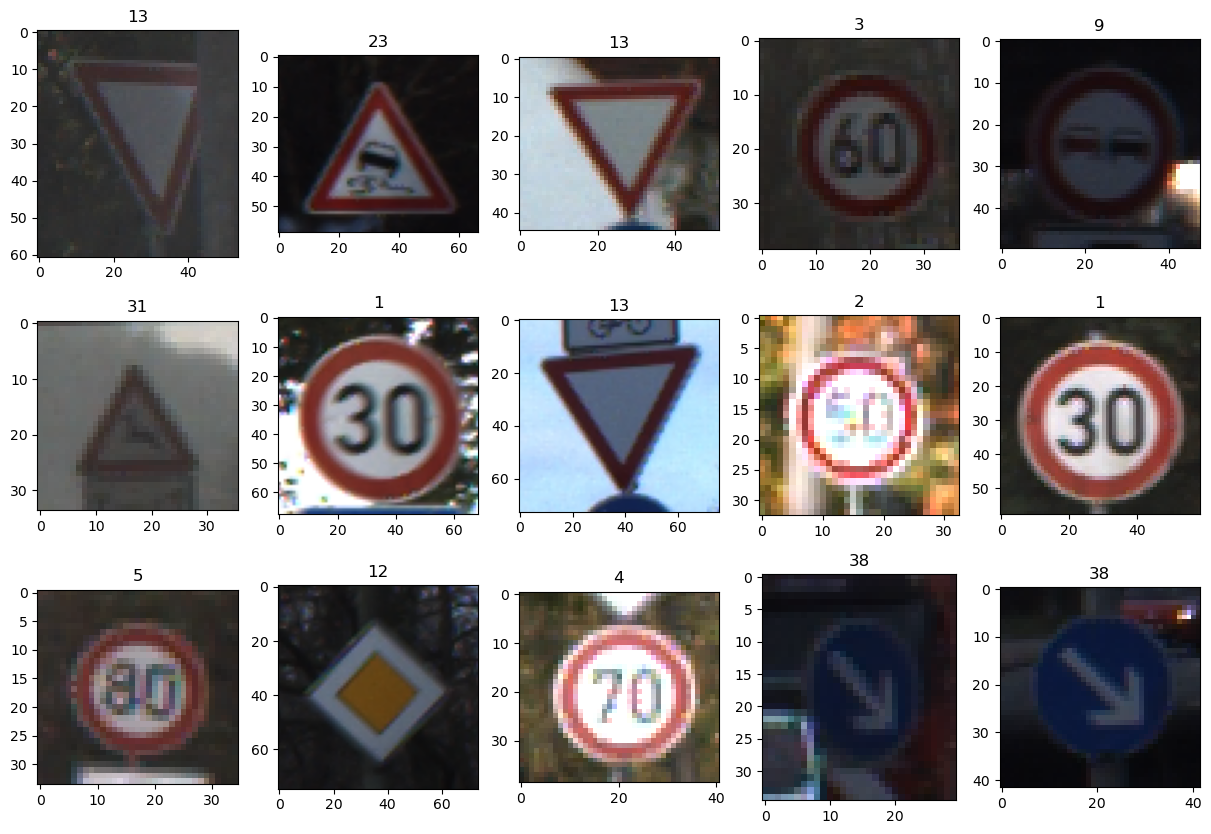

In [10]:
# Load the training labels
root = 'data' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

In [18]:
ids = data['ClassId']

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

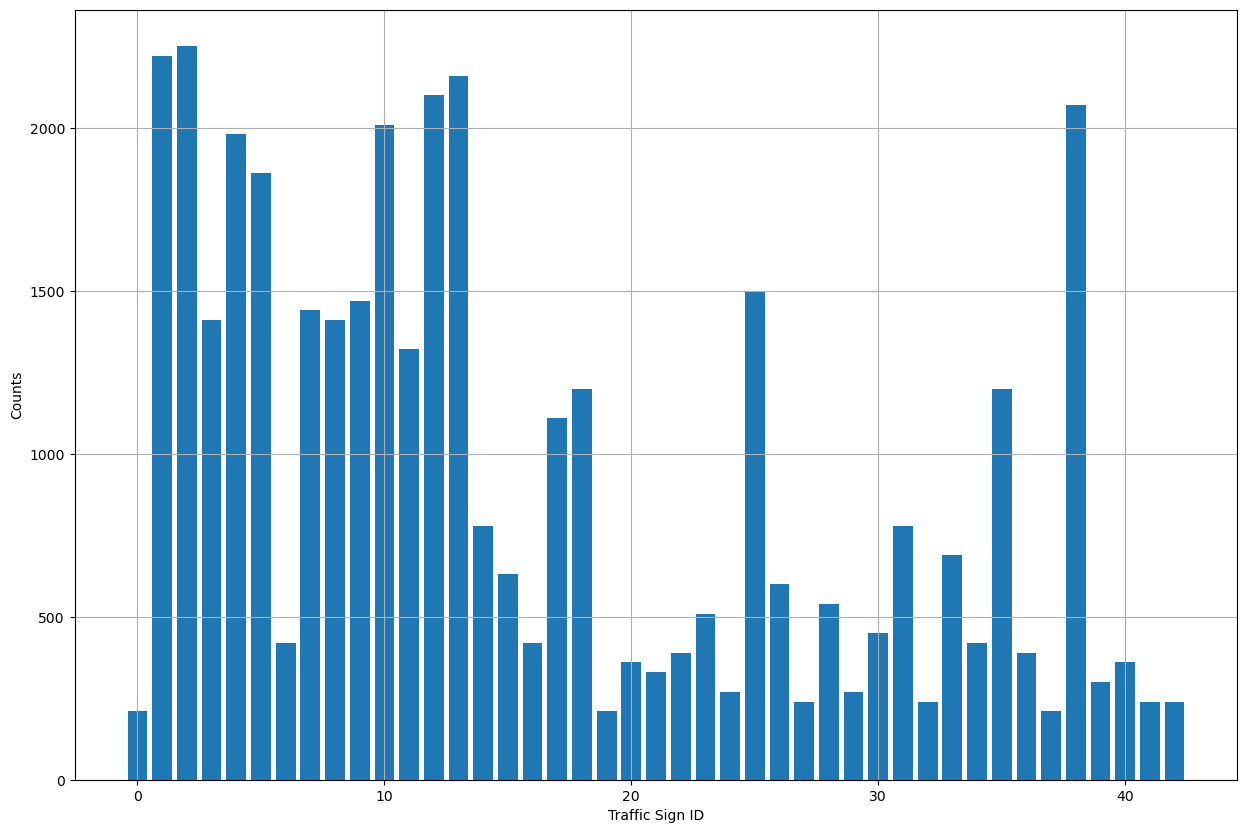

In [19]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

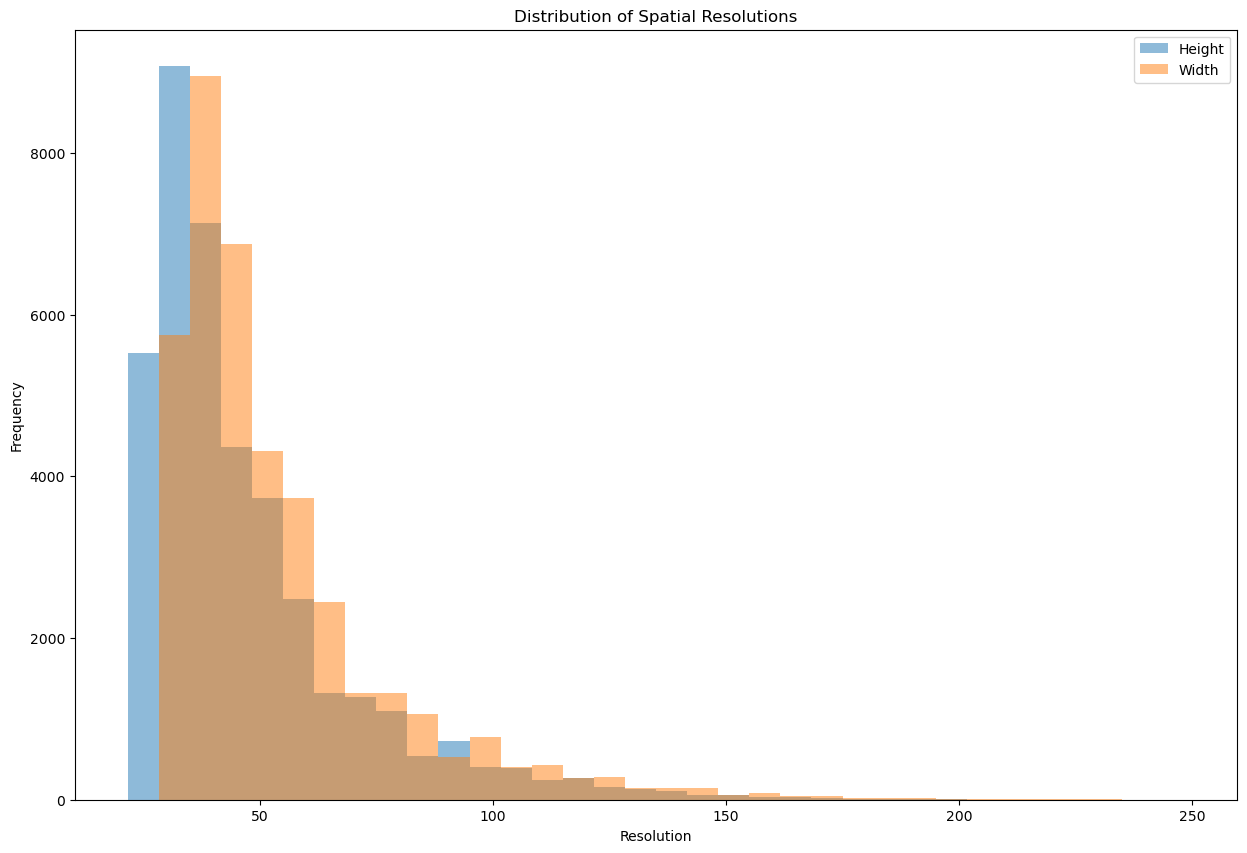

In [30]:
# Extract the resolutions (height and width) of all images in the dataset
resolutions = data.apply(lambda row: cv2.imread(os.path.join(root, row['Path'])).shape[:2], axis=1)

# Separate height and width into individual columns
resolutions_df = pd.DataFrame(resolutions.tolist(), columns=['Height', 'Width'])

# Calculate the number of bins and the width of each bin
num_bins = 30
bin_width = (resolutions_df['Height'].max() - resolutions_df['Height'].min()) / num_bins

# Define the bin edges for both height and width
height_bins = np.arange(resolutions_df['Height'].min(), resolutions_df['Height'].max() + bin_width, bin_width)
width_bins = np.arange(resolutions_df['Width'].min(), resolutions_df['Width'].max() + bin_width, bin_width)

# Plot the distribution of resolutions (height and width) side by side
plt.bar(height_bins[:-1], resolutions_df['Height'].value_counts(bins=height_bins, sort=False), width=bin_width, alpha=0.5, label='Height')
plt.bar(width_bins[:-1] + bin_width, resolutions_df['Width'].value_counts(bins=width_bins, sort=False), width=bin_width, alpha=0.5, label='Width')
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.title('Distribution of Spatial Resolutions')
plt.legend()
plt.show()

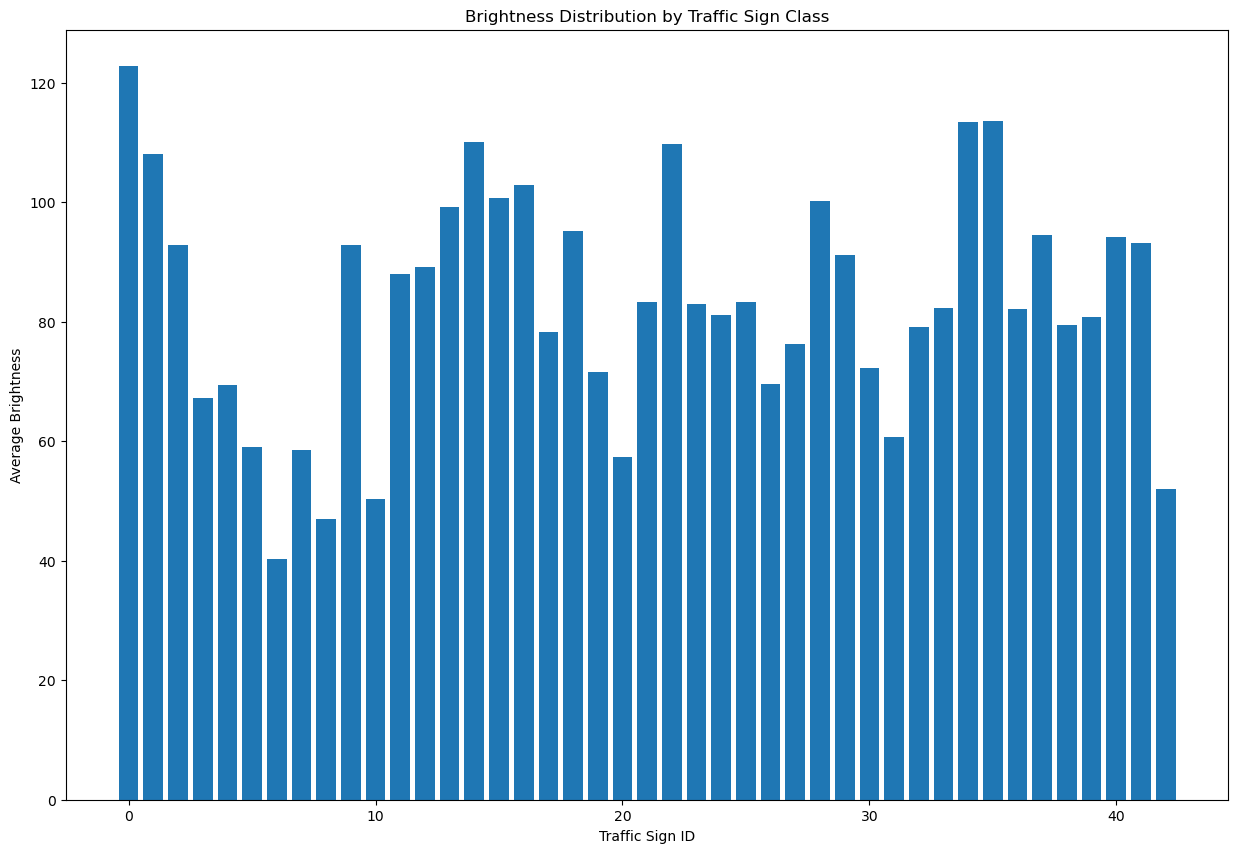

In [23]:
# Function to calculate image brightness
def calculate_brightness(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    brightness = np.mean(gray_img)
    return brightness

# Calculate brightness for each image in the dataset
brightness_values = []
for path in data['Path']:
    img = cv2.imread(os.path.join(root, path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    brightness = calculate_brightness(img)
    brightness_values.append(brightness)

# Add brightness values to the dataset
data['Brightness'] = brightness_values

# Calculate average brightness for each class
brightness_avg = data.groupby('ClassId')['Brightness'].mean()

# Plotting the brightness distribution per class
plt.bar(brightness_avg.index, brightness_avg.values)
plt.xlabel('Traffic Sign ID')
plt.ylabel('Average Brightness')
plt.title('Brightness Distribution by Traffic Sign Class')
plt.show()